<a href="https://colab.research.google.com/github/varshini901/CropRecommendation/blob/main/crop_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA READING AND DATA CLEANING

In [ ]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Data reading
import numpy as np
import pandas as pd
path="/content/Crop_recommendation.csv"
df=pd.read_csv(path)
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
x=df['label'].unique()
x

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
df['label'].value_counts()

apple          100
banana         100
maize          100
pomegranate    100
orange         100
papaya         100
watermelon     100
lentil         100
mungbean       100
cotton         100
kidneybeans    100
rice           100
mothbeans      100
grapes         100
blackgram      100
muskmelon      100
chickpea       100
pigeonpeas     100
coconut        100
jute           100
coffee         100
mango          100
Name: label, dtype: int64

# DATA PREPROCESSING

In [ ]:
df.shape

(2200, 8)

In [ ]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [ ]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
x=df.iloc[:,0:7]
y=df.iloc[:,7]
x

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


**TRAINING THE DATA USING DIFFERENT MODEL ALGORITHMS**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)

In [ ]:
from sklearn import metrics
a=metrics.accuracy_score(y_test,lr_pred)
a

0.95

In [ ]:
#DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=0)
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_test)

In [ ]:
from sklearn import metrics
b=metrics.accuracy_score(y_test,dt_pred)
b

0.9803030303030303

In [ ]:
# RANDOM FOREST CLASSIIFIER
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=0)
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)

In [ ]:
from sklearn import metrics
c=metrics.accuracy_score(y_test,rf_pred)
c

0.9939393939393939

**PRINTING THE ACCURACIES OF VARIOUS ALGORITHMS**

In [ ]:
models = []
models.append(('LogisticRegression', LogisticRegression(random_state=0)))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier(random_state=0)))
models.append(('RandomForestClassifier', RandomForestClassifier(random_state=0)))

model_name = []
accuracy = []

for name, model in models: 
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    model_name.append(name)
    accuracy.append(metrics.accuracy_score(y_test,y_pred))
    print(name, metrics.accuracy_score(y_test,y_pred))


LogisticRegression 0.95
DecisionTreeClassifier 0.9803030303030303
RandomForestClassifier 0.9939393939393939


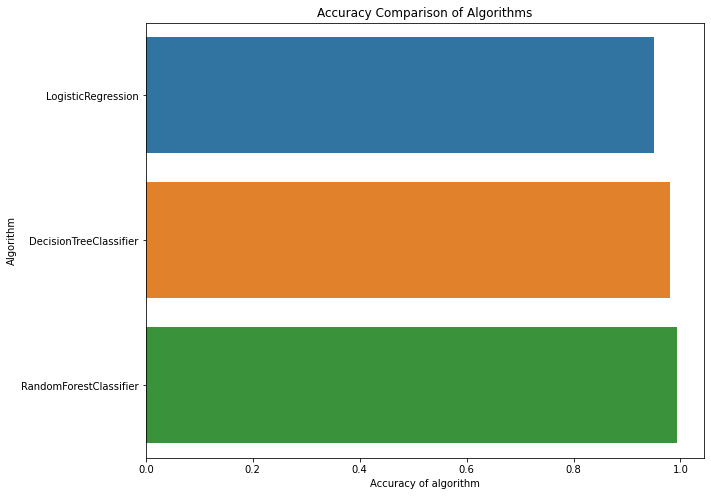

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Accuracy Comparison of Algorithms')
plt.xlabel('Accuracy of algorithm')
plt.ylabel('Algorithm')
sns.barplot(x = accuracy, y = model_name)
plt.show()

Random Forest Model has got the highest accuracy!


In [ ]:
input=[[90,	42,	43,	20.879744	,82.002744,	6.502985,	202.935536]]

In [ ]:
rf.predict(input)

array(['rice'], dtype=object)

In [ ]:
input_1=[[90,	42,	43,	20.879744	,82.002744,	6.502985,	202.935536],[85	,58	,41	,21.770462	,80.319644	,7.038096	,226.655537	]]

In [ ]:
rf.predict(input_1)

array(['rice', 'rice'], dtype=object)

In [ ]:
input_2=[[107,	34,	32,	26.774637,	66.413269,	6.780064,	177.774507]]
lr.predict(input_2)

array(['coffee'], dtype=object)

In [ ]:
input_3=[[71, 54,  16,    22.613600,  63.690706,  5.749914,   87.759539]]
dt.predict(input_3)

array(['maize'], dtype=object)